In [1]:
from manim import *
from numpy import linalg as npl
import math
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline
from multiprocessing import Process

diff_video_scene = " -v WARNING --progress_bar None --disable_caching differentiation_Scene"
diff_image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s differentiation_Scene"

int_video_scene = " -v WARNING --progress_bar None --disable_caching integration_Scene"
int_image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s integration_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.8


Output saved by creating file at animations/differentiation_integration/differentiation.mp4.


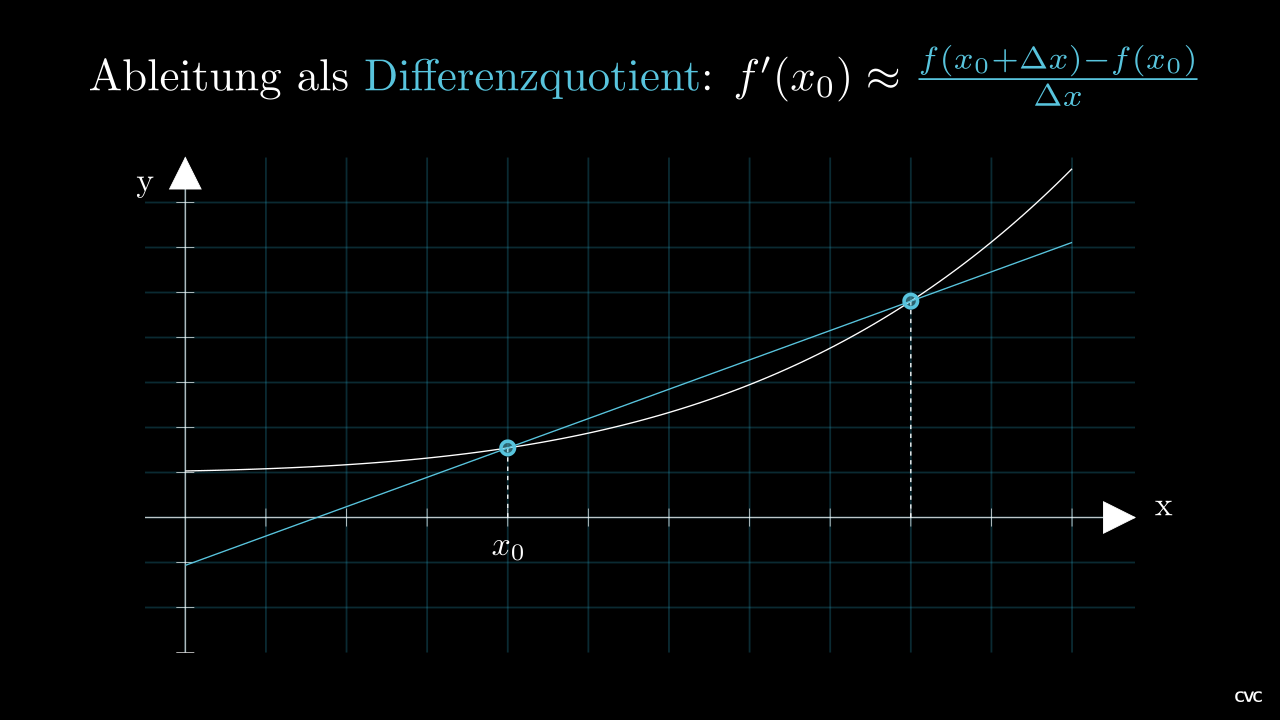

In [86]:
%%capture_video --path "animations/differentiation_integration/differentiation.mp4"
%%manim -qm --fps 60 $diff_video_scene

class differentiation_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        text_diff_q = Tex(r"Ableitung als Differenzquotient: $f'(x_0)\approx\frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
        text_diff_q[0][12:28].set_color(BLUE)
        text_diff_q[0][36:56].set_color(BLUE)


        # Integrierbare Funktion (abhängig von x)
        func_range = [4, 9]
        def differentiable_function(x):
            return (x+4) ** 4 / 7500 + 1


        # Baut Sekate für gegebene 2 Punkte
        def make_secunt(x0, x0_plus_delta):
            m = (x0_plus_delta[1]-x0[1]) / (x0_plus_delta[0]-x0[0])
            b = x0[1] - x0[0] * m
            secunt = Line(ax.c2p(0, b), ax.c2p(11, 11*m+b), stroke_width = 1.5, stroke_opacity = 1, color = BLUE)
            return secunt


        # Main: Coordinate System
        origin = [0, -0.5, 0]

        x_range = [-0.5, 3.75*PI, 1]
        y_range = [-3, 8, 1]

        x_length = 11
        y_length = 5.5

        x_dict = dict(zip([func_range[0]], [r"$x_0$"]))

        npla = NumberPlane(
            x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin)
        ax = Axes(x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, axis_config = {"stroke_width": 1, "stroke_opacity": 0.75}).move_to(origin).add_coordinates(x_dict)

        ax_xlabel = ax.get_x_axis_label(Tex(r"x", font_size = 36)).shift(0.25*DOWN + 0.125*RIGHT)
        ax_ylabel = ax.get_y_axis_label(Tex(r"y", font_size = 36)).shift(0.8125*LEFT + 0.5*DOWN)

        coordinate_system = VGroup(npla, ax, ax_xlabel, ax_ylabel)
        func = ax.plot(differentiable_function, color = WHITE, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 11])

        fa_connect = DashedLine(ax.c2p(func_range[0], 0), ax.c2p(func_range[0], differentiable_function(func_range[0])), stroke_color = WHITE, stroke_width = 1.5, stroke_opacity = 1)
        fb_connect = DashedLine(ax.c2p(func_range[1], 0), ax.c2p(func_range[1], differentiable_function(func_range[1])), stroke_color = WHITE, stroke_width = 1.5, stroke_opacity = 1)

        x0_dot = Circle(radius = 0.075, color = BLUE, fill_opacity = 0.5).move_to(ax.c2p(func_range[0], differentiable_function(func_range[0])))
        x0_plus_delta_dot = Circle(radius = 0.075, color = BLUE, fill_opacity = 0.5).move_to(ax.c2p(func_range[1], differentiable_function(func_range[1])))

        rect = 

        self.add(coordinate_system, func, fa_connect, fb_connect, x0_dot, x0_plus_delta_dot)
        self.add(text_diff_q)
        secunt = make_secunt([func_range[0], differentiable_function(func_range[0])], [func_range[1], differentiable_function(func_range[1])])
        self.add(secunt)

In [49]:
%%capture_video --path "animations/differentiation_integration/integration.mp4"
%%manim -qh --fps 60 $int_video_scene

class integration_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        text_riemann = Tex(r"Integral als Riemannsumme: $\int_a^bf(x)dx\approx\sum_{i=1}^nf(x_i)\Delta x$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
        text_riemann[0][11:23].set_color(BLUE)
        text_riemann[0][34:46].set_color(BLUE)

        fxi_box = SurroundingRectangle(text_riemann[0][39:44], buff = .1, color = BLUE)
        dx_box = SurroundingRectangle(text_riemann[0][44:46], buff = .1, color = BLUE)


        # Integrierbare Funktion (abhängig von x)
        func_range = [2, 11]
        def integrable_function(x):
            return -1 + 3*x - 14*(x/4)**2 + 3.8*(x/4)**3

        
        # Riemann-Summe (abhängig von n)
        def riemann_squares(n):
            a = func_range[0]
            b = func_range[1]
            delta_x = (b - a) / n
            riemann_group = VGroup()
            for i in range(n):
                left = a + i * delta_x
                right = a + (i+1) * delta_x
                upper = integrable_function(right)
                polygon = Polygon(ax.c2p(left, 0), ax.c2p(left, upper), ax.c2p(right, upper), ax.c2p(right, 0), stroke_width = 1.5, color = BLUE, fill_color = BLUE, fill_opacity = 0.25, stroke_opacity = 1)
                riemann_group.add(polygon)
                #self.add(polygon)
            return riemann_group


        # Main: Coordinate System
        origin = [0, -0.5, 0]

        x_range = [-0.5, 3.75*PI, 1]
        y_range = [-4, 6, 1]

        x_length = 11
        y_length = 5.5

        x_dict = dict(zip([func_range[0], func_range[1]], [r"a", r"b"]))

        npla = NumberPlane(
            x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin)
        ax = Axes(x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, axis_config = {"stroke_width": 1, "stroke_opacity": 0.75}).move_to(origin).add_coordinates(x_dict)

        ax_xlabel = ax.get_x_axis_label(Tex(r"x", font_size = 36)).shift(0.25*DOWN + 0.125*RIGHT)
        ax_ylabel = ax.get_y_axis_label(Tex(r"y", font_size = 36)).shift(0.8125*LEFT + 0.5*DOWN)

        coordinate_system = VGroup(npla, ax, ax_xlabel, ax_ylabel)
        func = ax.plot(integrable_function, color = WHITE, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, func_range[1]])

        fa_connect = DashedLine(ax.c2p(func_range[0], 0), ax.c2p(func_range[0], integrable_function(func_range[0])), stroke_color = WHITE, stroke_width = 1.5, stroke_opacity = 1)
        fb_connect = DashedLine(ax.c2p(func_range[1], 0), ax.c2p(func_range[1], integrable_function(func_range[1])), stroke_color = WHITE, stroke_width = 1.5, stroke_opacity = 1)

        # braces
        brace_rect = Polygon(
            ax.c2p(func_range[0], 0), 
            ax.c2p(func_range[0], integrable_function(func_range[0] + (func_range[1] - func_range[0]) / 10)), 
            ax.c2p(func_range[0] + (func_range[1] - func_range[0]) / 10, integrable_function(func_range[0] + (func_range[1] - func_range[0]) / 10)), 
            ax.c2p(func_range[0] + (func_range[1] - func_range[0]) / 10, 0))

        fxi_brace = Brace(brace_rect, color = BLUE, direction = np.array([-1, 0, 0]), buff = 0.2, sharpness = 2)
        dx_brace = Brace(brace_rect, color = BLUE, direction = np.array([0, -1, 0]), buff = 0.2, sharpness = 2)
        fxi_text = Tex(r"$f(x_1)$", font_size = 36, color = BLUE).next_to(fxi_brace, LEFT, buff = 0.2)
        dx_text = Tex(r"$\Delta x$", font_size = 36, color = BLUE).next_to(dx_brace, DOWN, buff = 0.1)
        fxi_brace_group = VGroup(fxi_brace, fxi_text)
        dx_brace_group = VGroup(dx_brace, dx_text)

        # add all
        # self.add(text_riemann, coordinate_system, func, riemann_squares(10))
        # self.add(fxi_brace_group, dx_brace_group, fxi_box, dx_box)

        # Animation
        self.play(Write(text_riemann), run_time = 3)
        self.play(FadeIn(coordinate_system), run_time = 3)
        self.wait(0.5)
        self.play(Create(func), run_time = 3)
        self.wait(0.5)
        self.play(Create(fa_connect), Create(fb_connect), run_time = 1.5)
        self.wait(0.5)
        riemann_squares_pre = riemann_squares(10)
        self.play(Create(riemann_squares_pre), run_time = 5)
        self.wait(0.5)
        self.play(Create(fxi_box), run_time = 1.5)
        self.play(TransformFromCopy(fxi_box, fxi_brace_group), run_time = 1.5)
        self.wait(0.5)
        self.play(Uncreate(fxi_box), run_time = 1.5)
        self.wait(0.5)
        self.play(Create(dx_box), run_time = 1.5)
        self.play(TransformFromCopy(dx_box, dx_brace_group), run_time = 1.5)
        self.wait(0.5)
        self.play(Uncreate(dx_box), run_time = 1.5)
        self.wait(1.5)
        self.play(FadeOut(fxi_brace_group), FadeOut(dx_brace_group), run_time = 1.5)
        self.wait(1.5)

        for i in range(11, 200, 1):
            riemann_squares_post = riemann_squares(i)
            self.play(FadeTransform(riemann_squares_pre, riemann_squares_post), run_time = 2 / i)
            riemann_squares_pre = riemann_squares_post

        self.wait(5)

Output saved by overwring previous file at animations/differentiation_integration/integration.mp4.
